# 0. index
1. Decision tree
    - simulation
    - fit
    - accuracy
    - confusion matrix
    - CV 파라미터 최적화
    - decision boundary
2. Random forest

# 1. Decision tree

## 1-1. simulation

In [1]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0, n_classes=2, random_state=1)

In [4]:
import matplotlib.pyplot as plt

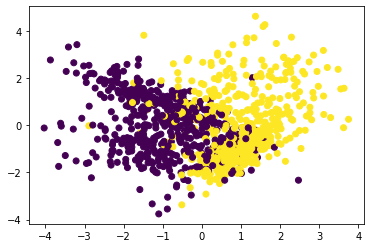

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

## 1-2. fit

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train) #training tree

DecisionTreeClassifier()

In [13]:
#prediction
tree.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1])

## 1-3. accuracy

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test,tree.predict(X_test))

0.79

In [17]:
sum(y_train==1)
sum(y_train==0)

401

## 1-4. confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test,tree.predict(X_test))

array([[73, 25],
       [17, 85]], dtype=int64)

## 1-5. best_parameter

In [25]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
tree_cv = GridSearchCV(DecisionTreeClassifier(),params,cv=5)
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [27]:
tree_cv.best_params_

{'max_leaf_nodes': 14, 'min_samples_split': 4}

In [28]:
accuracy_score(y_test,tree_cv.predict(X_test))

0.85

In [29]:
confusion_matrix(y_test,tree_cv.predict(X_test))

array([[83, 15],
       [15, 87]], dtype=int64)

**comment : after applying 'best_parameter', accuracy is got better!**

## 1-6. Decision Boundary

In [35]:
from mlxtend.plotting import plot_decision_regions

In [32]:
import matplotlib.gridspec as gridspec

In [34]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree4 = DecisionTreeClassifier(max_depth=4)
tree6 = DecisionTreeClassifier(max_depth=6)
tree8 = DecisionTreeClassifier(max_depth=8)

In [42]:
gs=gridspec.GridSpec(2,2)

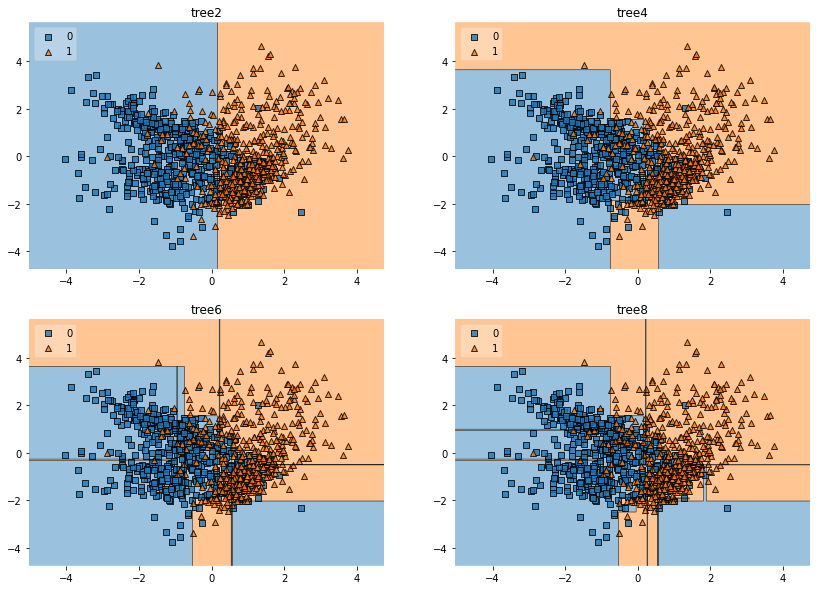

In [40]:
fig=plt.figure(figsize=(14,10))

labels=['tree2','tree4','tree6','tree8']

for clf, lab, grid in zip([tree2,tree4,tree6,tree8],labels,[(0,0),(0,1),(1,0),(1,1)]):
    clf.fit(X,y)
    ax=plt.subplot(gs[grid[0],grid[1]])
    fig = plot_decision_regions(X=X,y=y,clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

**comment : As max_depth is getting deeper, then there might be a problem in overfitting**

# chap.6 
## EX 7) Train and fine-tune a Decision Tree for the moons dataset.

### a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

In [43]:
from sklearn.datasets import make_moons

In [44]:
X, y = make_moons(n_samples=1000,noise=0.4)

### b. Split it into a training set and a test set using train_test_split().

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train) #training tree

DecisionTreeClassifier()

In [47]:
#prediction
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [48]:
accuracy_score(y_test,tree.predict(X_test))

0.8

In [49]:
confusion_matrix(y_test,tree.predict(X_test))

array([[86, 21],
       [19, 74]], dtype=int64)

### c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier.  Hint: try various values for max_leaf_nodes.

In [50]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
tree_cv = GridSearchCV(DecisionTreeClassifier(),params,cv=5)
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [51]:
tree_cv.best_params_

{'max_leaf_nodes': 4, 'min_samples_split': 2}

### d. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [52]:
accuracy_score(y_test,tree_cv.predict(X_test))

0.86

In [53]:
confusion_matrix(y_test,tree_cv.predict(X_test))

array([[95, 12],
       [16, 77]], dtype=int64)

## Plot learning curve

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def plot_learning_curve(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    train_error, test_error=[],[]
    min_samples = np.arange(2,100).astype('int')
    for min_sample in min_samples:
        model.set_params(min_samples_split=min_sample)
        model.fit(X_train,y_train)
        train_error.append(model.score(X_train,y_train))
        test_error.append(model.score(X_test,y_test))
    plt.plot(min_samples,train_error,label='train')
    plt.plot(min_samples,test_error,label='test')
    plt.legend(loc='upper right')
    plt.xlabel('min_sample_split')
    plt.ylabel('performance')

In [60]:
tree = DecisionTreeClassifier()

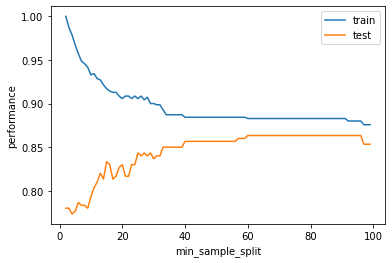

In [76]:
plot_learning_curve(tree,X,y)

comment : min_sample_split을 작게 설정할수록 과적합 발생 → 따라서, 최소 샘플수가 커질수록 분류 예측률은 높아진다.

참고 자료 : https://injo.tistory.com/15

# Feature Importance

In [4]:
from sklearn.ensemble import RandomForestClassifier

## Data Loading

In [1]:
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()

In [10]:
X=iris.data
y=iris.target

rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [11]:
#mean decrease impurity
rf.feature_importances_

array([0.08661315, 0.02784116, 0.4455911 , 0.43995459])

In [19]:
#permutation importance
from sklearn.inspection import permutation_importance

permutation_importance(rf,X,y)

{'importances_mean': array([0.012     , 0.01066667, 0.348     , 0.17466667]),
 'importances_std': array([0.00653197, 0.00533333, 0.05153639, 0.01950499]),
 'importances': array([[0.        , 0.01333333, 0.01333333, 0.01333333, 0.02      ],
        [0.01333333, 0.00666667, 0.00666667, 0.00666667, 0.02      ],
        [0.40666667, 0.26666667, 0.34      , 0.32666667, 0.4       ],
        [0.19333333, 0.14      , 0.19333333, 0.17333333, 0.17333333]])}